In [1]:
import torch

# Habilitar cálculo de gradientes
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

# Definir la función vectorial
f1 = x ** 2 * y
f2 = torch.sin(x * y)
f = torch.stack([f1, f2])

# Calcular el Jacobiano
jacobian = []
for f_i in f:
    grads = torch.autograd.grad(f_i, [x, y], retain_graph=True, create_graph=True)
    jacobian.append([grads[0], grads[1]])

jacobian_matrix = torch.tensor(jacobian)
print("Jacobiano evaluado en x=1, y=2:")
print(jacobian_matrix)


Jacobiano evaluado en x=1, y=2:
tensor([[ 4.0000,  1.0000],
        [-0.8323, -0.4161]])


In [2]:
# Ejemplo simplificado de un flujo normal lineal
def linear_flow(x, weight, bias):
    return torch.matmul(x, weight) + bias

# Variables
x = torch.randn(1, 2)
weight = torch.tensor([[1.0, 0.5], [0.5, 1.0]], requires_grad=True)
bias = torch.tensor([0.0, 0.0], requires_grad=True)

# Transformación
z = linear_flow(x, weight, bias)

# Cálculo del Jacobiano
jacobian = torch.autograd.functional.jacobian(lambda x: linear_flow(x, weight, bias), x)
determinant = torch.det(jacobian.squeeze())
print("Determinante del Jacobiano:", determinant.item())


Determinante del Jacobiano: 0.75


In [10]:
import torch

# Función de pérdida simple
def loss_fn(x):
    return x ** 4 - 3 * x ** 3 + 2

# Punto inicial
x = torch.tensor(0.0, requires_grad=True)

# Número de iteraciones
num_iters = 10

for i in range(num_iters):
    # Calcular la pérdida
    loss = loss_fn(x)

    # Calcular el gradiente de primer orden
    grad = torch.autograd.grad(loss, x, create_graph=True)[0]

    # Calcular el gradiente de segundo orden (Hessiano)
    hessian = torch.autograd.grad(grad, x)[0]

    # Actualización de Newton-Raphson
    with torch.no_grad():
        x -= grad / hessian

    # Cero los gradientes
    x.grad.zero_()

    print(f"Iteración {i}, x = {x.item()}, pérdida = {loss.item()}")


AttributeError: 'NoneType' object has no attribute 'zero_'

In [4]:
import torch

# Definir una función vectorial
def vector_function(x):
    return torch.stack([
        x[0] ** 2 + x[1],
        torch.sin(x[0]) * x[1]
    ])

# Punto de evaluación
x = torch.tensor([1.0, 2.0], requires_grad=True)

# Calcular el Jacobiano
jacobian = torch.autograd.functional.jacobian(vector_function, x)
print("Jacobiano de la función en x=[1, 2]:")
print(jacobian)


Jacobiano de la función en x=[1, 2]:
tensor([[2.0000, 1.0000],
        [1.0806, 0.8415]])


In [5]:
import torch

# Definir una función escalar
def scalar_function(x):
    return x[0] ** 3 + x[0] * x[1] + torch.exp(x[1])

# Punto de evaluación
x = torch.tensor([1.0, 2.0], requires_grad=True)

# Calcular el Hessiano
hessian = torch.autograd.functional.hessian(scalar_function, x)
print("Hessiano de la función en x=[1, 2]:")
print(hessian)


Hessiano de la función en x=[1, 2]:
tensor([[6.0000, 1.0000],
        [1.0000, 7.3891]])


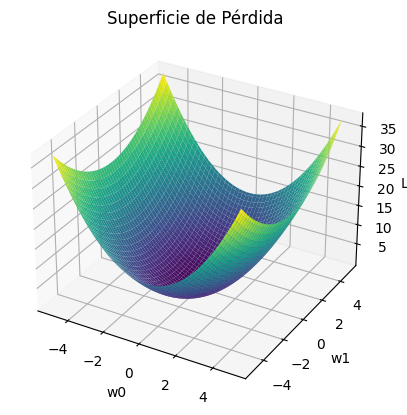

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Definir una función de pérdida simple en 2D
def loss_fn(w):
    return w[0] ** 2 + 0.5 * w[1] ** 2

# Generar una cuadrícula de puntos
w0 = np.linspace(-5, 5, 100)
w1 = np.linspace(-5, 5, 100)
W0, W1 = np.meshgrid(w0, w1)
L = loss_fn([W0, W1])

# Graficar la superficie de pérdida
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, L, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss')
plt.title('Superficie de Pérdida')
plt.show()


In [7]:
import torch

# Punto de evaluación
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)

# Definir la función vectorial
f1 = x * y
f2 = y * z
f3 = z * x
f = torch.stack([f1, f2, f3])

# Calcular el Jacobiano
jacobian = []
for f_i in f:
    grads = torch.autograd.grad(f_i, [x, y, z], retain_graph=True)
    jacobian.append([grads[0], grads[1], grads[2]])

jacobian_matrix = torch.tensor(jacobian)
print("Jacobiano evaluado en x=1, y=2, z=3:")
print(jacobian_matrix)


Jacobiano evaluado en x=1, y=2, z=3:
tensor([[2., 1., 0.],
        [0., 3., 2.],
        [3., 0., 1.]])


In [8]:
import torch

# Punto de evaluación
x = torch.tensor(0.0, requires_grad=True)
y = torch.tensor(torch.pi, requires_grad=True)

# Definir la función escalar
def scalar_function(v):
    x, y = v[0], v[1]
    return torch.sin(x * y) + x ** 2

# Calcular el Hessiano
hessian = torch.autograd.functional.hessian(scalar_function, (x, y))
print("Hessiano evaluado en x=0, y=pi:")
print(hessian)


TypeError: scalar_function() takes 1 positional argument but 2 were given